yt : [INFO     ] 2024-03-26 17:27:37,038 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:27:37,039 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:27:37,039 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:27:37,040 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:27:37,447 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:27:37,448 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:27:37,448 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:27:37,449 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


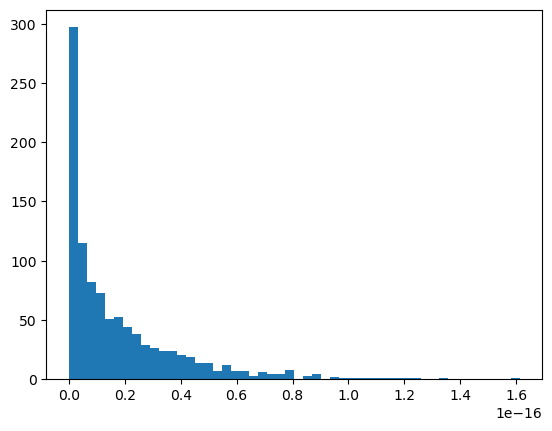

In [6]:
import yt
import numpy as np
import matplotlib.pyplot as plt


sigmaarr=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]
sigmaspec=np.zeros((20,50))

ds = yt.load('warpx/diags/diag1000000.old.9306200(0.5initial)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx\diags\diag1001270.old.9658600(0.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
length=max(Spectrum)-min(Spectrum)
sigmaspec[0]=np.array(counts)


1.581481516627444e-16


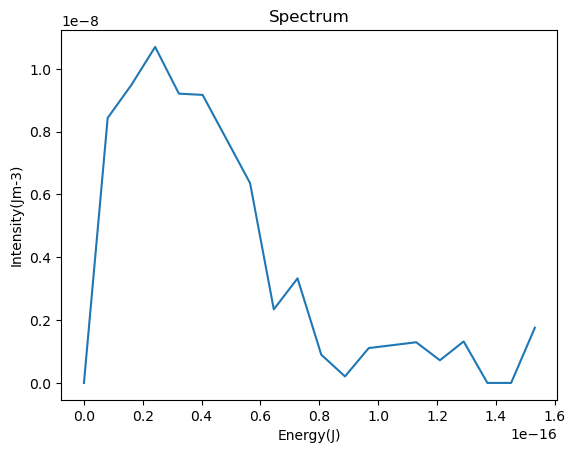

In [9]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:29:01,802 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:29:01,803 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:29:01,803 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:29:01,804 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:29:02,212 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:29:02,213 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:29:02,213 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:29:02,214 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


[297. 115.  82.  73.  51.  52.  44.  38.  29.  26.  24.  24.  20.  19.
  14.  14.   7.  12.   7.   7.   3.   6.   4.   4.   8.   0.   3.   4.
   0.   2.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.   0.   1.
   0.   0.   0.   0.   0.   0.   0.   1.]


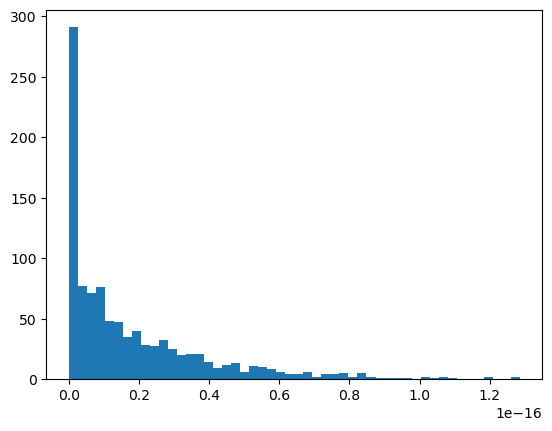

In [11]:
ds = yt.load('warpx/diags/diag1000000.old.8161300(1)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(1)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)


print(counts)

counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
sigmaspec[1]=np.array(counts)

1.2603375675491445e-16


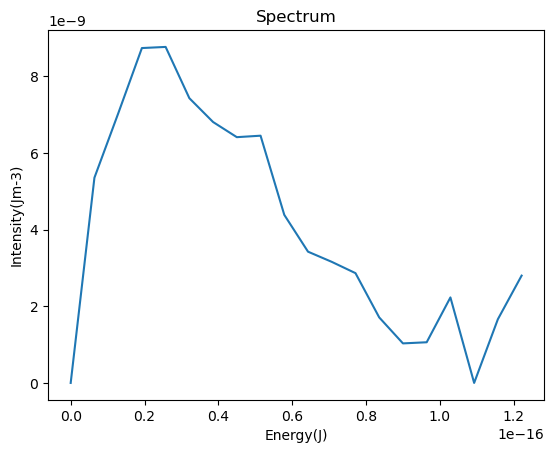

In [12]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:29:14,881 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:29:14,882 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:29:14,882 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:29:14,882 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:29:15,399 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:29:15,399 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:29:15,400 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:29:15,400 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


[319. 120.  80.  66.  72.  41.  52.  39.  34.  25.  30.  20.  11.   7.
  14.  12.   8.   6.   9.  10.   1.   4.   5.   3.   2.   2.   1.   1.
   2.   0.   0.   1.   0.   0.   0.   0.   1.   1.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   1.]


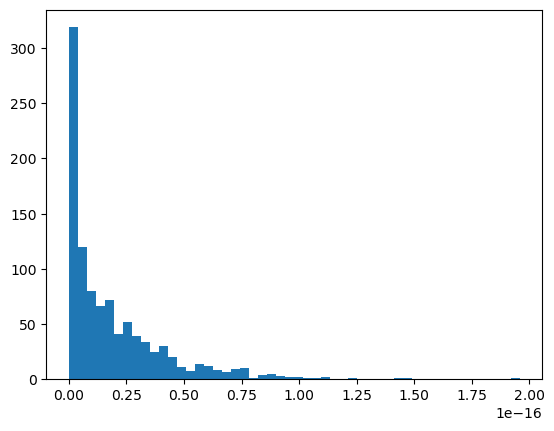

In [13]:
ds = yt.load('warpx/diags/diag1000000.old.8735800(1.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(1.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)


counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
print(counts)
sigmaspec[2]=np.array(counts)

1.9200978560937905e-16


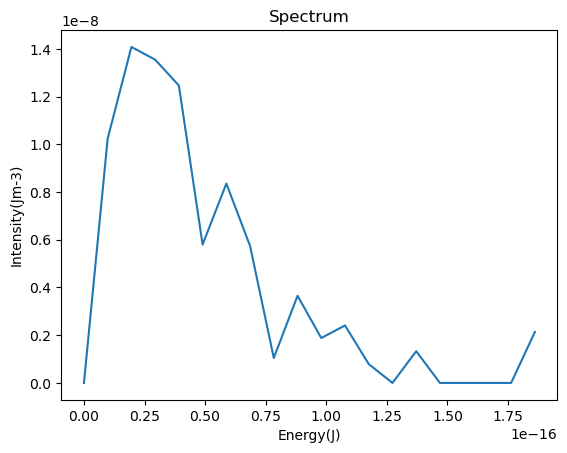

In [14]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:29:23,875 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:29:23,875 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:29:23,876 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:29:23,876 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:29:24,294 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:29:24,294 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:29:24,295 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:29:24,296 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


[319. 120.  80.  66.  72.  41.  52.  39.  34.  25.  30.  20.  11.   7.
  14.  12.   8.   6.   9.  10.   1.   4.   5.   3.   2.   2.   1.   1.
   2.   0.   0.   1.   0.   0.   0.   0.   1.   1.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   1.]


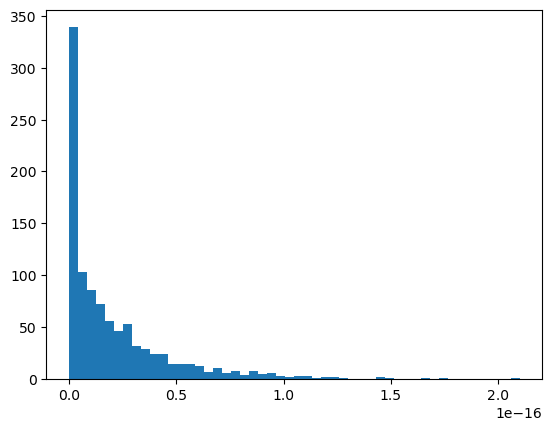

In [15]:
ds = yt.load('warpx/diags/diag1000000.old.1846300(2)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(2)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
print(counts)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
sigmaspec[3]=np.array(counts)

2.0587581505288385e-16


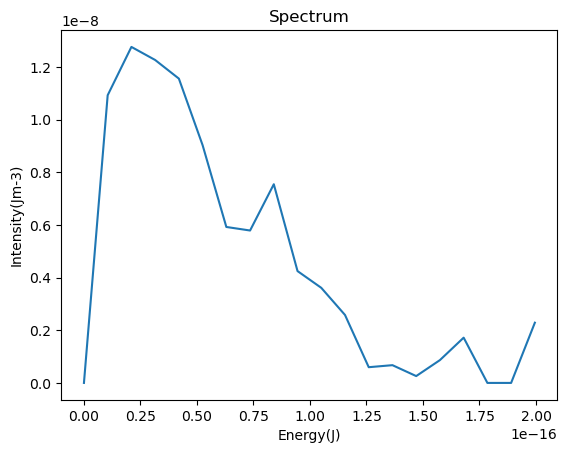

In [16]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:29:45,587 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:29:45,587 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:29:45,588 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:29:45,589 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:29:46,004 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:29:46,005 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:29:46,005 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:29:46,006 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


[331.  85.  78.  62.  53.  50.  37.  53.  26.  34.  24.  18.  20.  11.
  20.  13.  11.   4.   8.   9.   8.   3.   9.   4.   4.   5.   0.   4.
   1.   1.   0.   1.   1.   2.   0.   2.   0.   1.   0.   1.   1.   2.
   1.   0.   0.   0.   1.   0.   0.   1.]


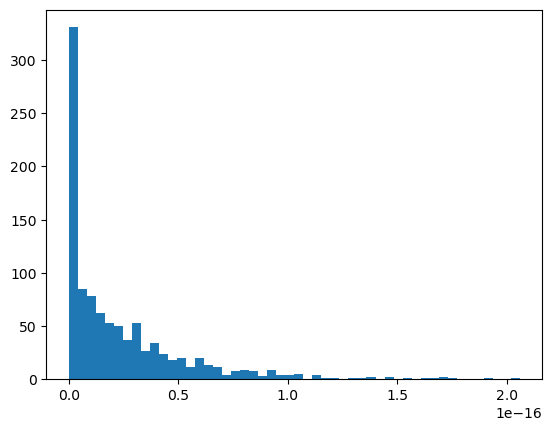

In [17]:
ds = yt.load('warpx/diags/diag1000000.old.9453000(2.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(2.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)

counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
print(counts)
sigmaspec[4]=np.array(counts)

2.018000680262422e-16


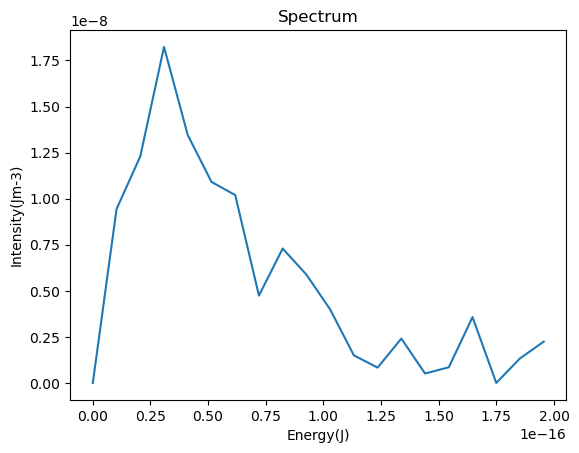

In [18]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:30:03,138 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:30:03,139 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:30:03,139 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:30:03,140 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:30:03,659 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:30:03,660 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:30:03,660 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:30:03,661 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


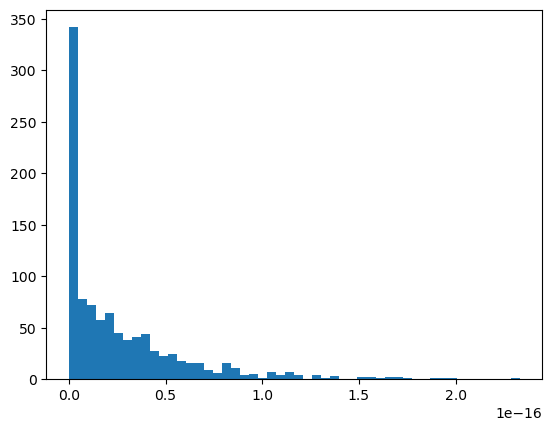

In [19]:
ds = yt.load('warpx/diags/diag1000000.old.5074700(3)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(3)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
sigmaspec[5]=np.array(counts)

2.2859413398865525e-16


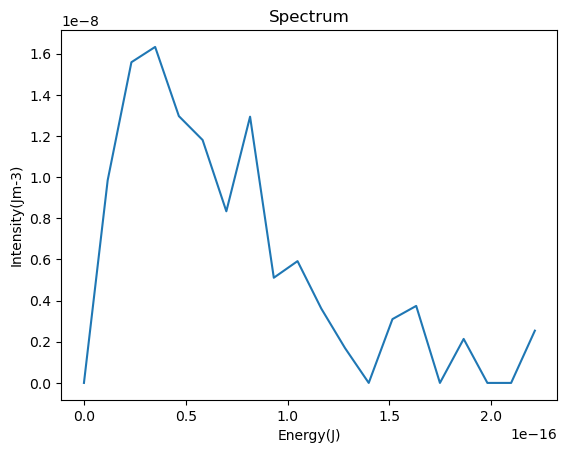

In [20]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:30:19,516 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:30:19,517 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:30:19,517 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:30:19,518 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:30:20,043 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:30:20,044 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:30:20,044 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:30:20,045 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


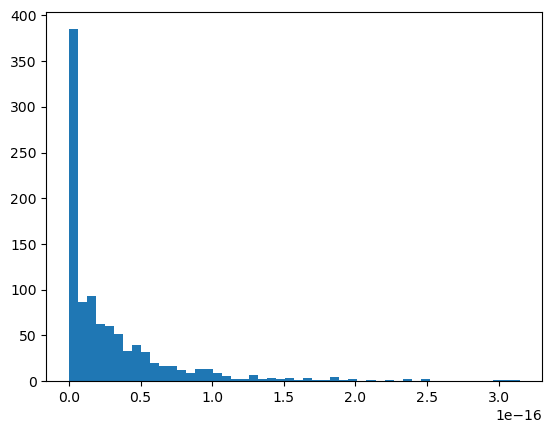

In [21]:
ds = yt.load('warpx/diags/diag1000000.old.7967000(3.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(3.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
sigmaspec[6]=np.array(counts)

3.0852030212971863e-16


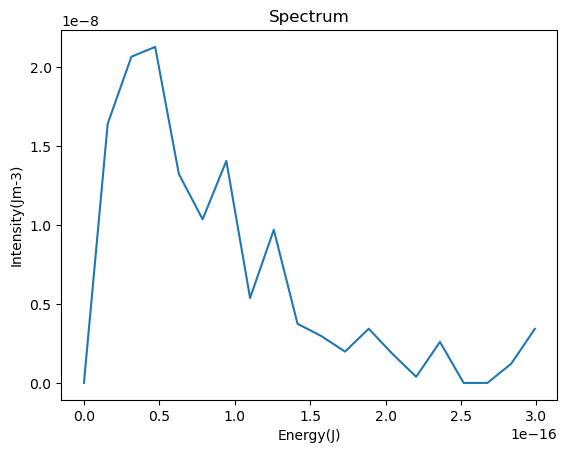

In [22]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:30:30,812 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:30:30,813 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:30:30,813 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:30:30,814 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:30:31,231 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:30:31,232 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:30:31,233 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:30:31,233 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


[395.  90.  90.  70.  56.  45.  39.  34.  30.  25.  21.  17.  10.  11.
   9.   5.   5.   8.   2.   4.   6.   5.   4.   1.   3.   4.   0.   0.
   2.   1.   2.   1.   0.   0.   0.   1.   0.   0.   1.   0.   0.   0.
   0.   0.   0.   1.   0.   0.   0.   2.]


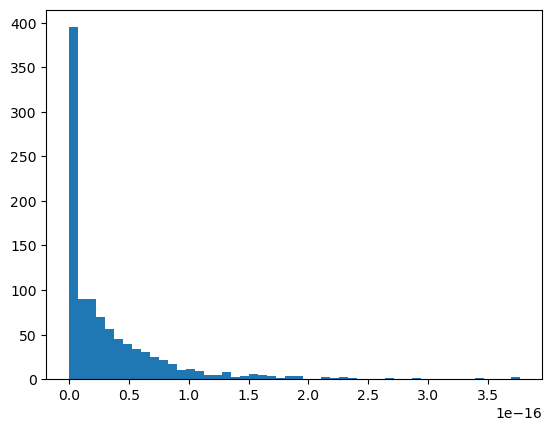

In [23]:
ds = yt.load('warpx/diags/diag1000000(4)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(4)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)




counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
print(counts)
sigmaspec[7]=np.array(counts)

3.6906102710064877e-16


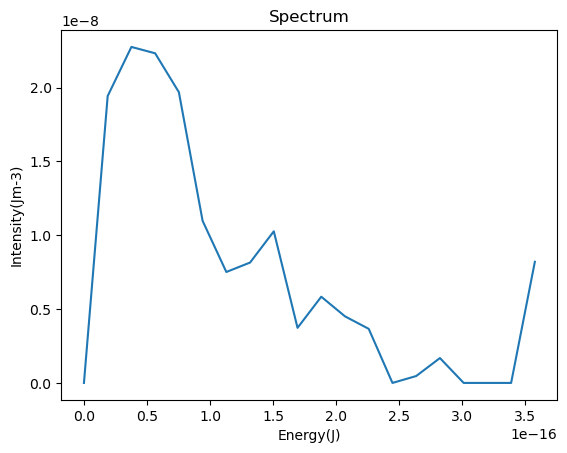

In [24]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:30:43,647 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:30:43,648 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:30:43,648 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:30:43,649 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:30:44,062 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:30:44,062 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:30:44,063 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:30:44,064 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


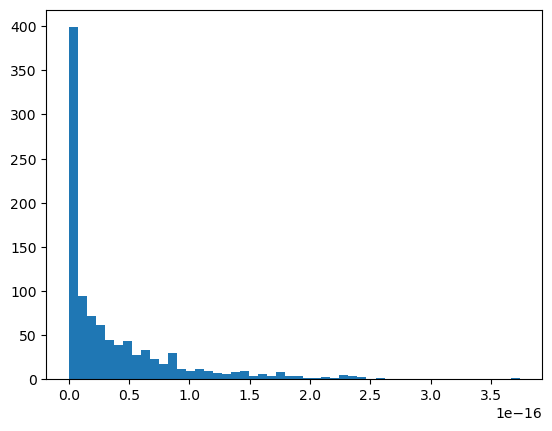

In [25]:
ds = yt.load('warpx/diags/diag1000000.old.80456009(4.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(4.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)





counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
sigmaspec[8]=np.array(counts)

3.6674827284217395e-16


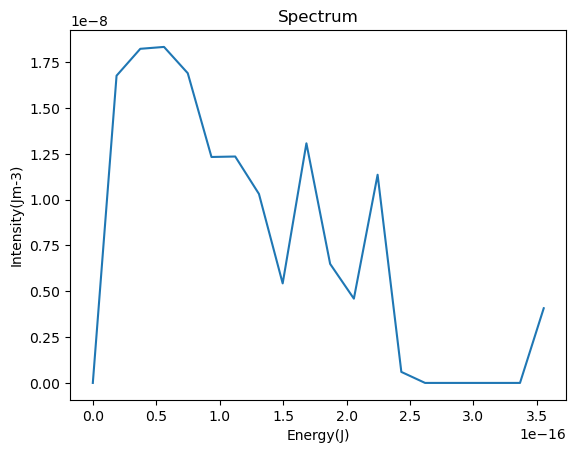

In [26]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:37:10,239 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:37:10,240 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:37:10,240 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:37:10,241 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:37:10,652 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:37:10,652 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:37:10,653 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:37:10,653 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


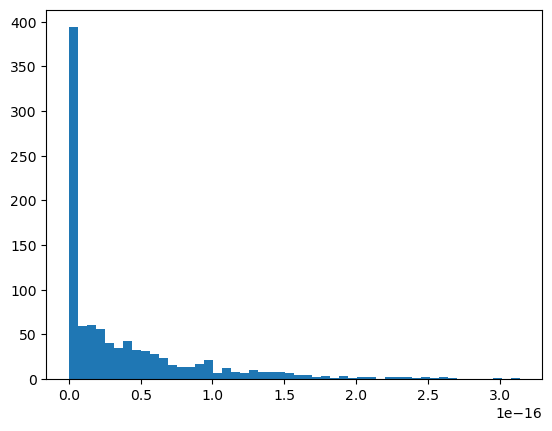

In [60]:
ds = yt.load('warpx/diags/diag1000000(5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)




counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
sigmaspec[9]=np.array(counts)

3.0786864906704404e-16


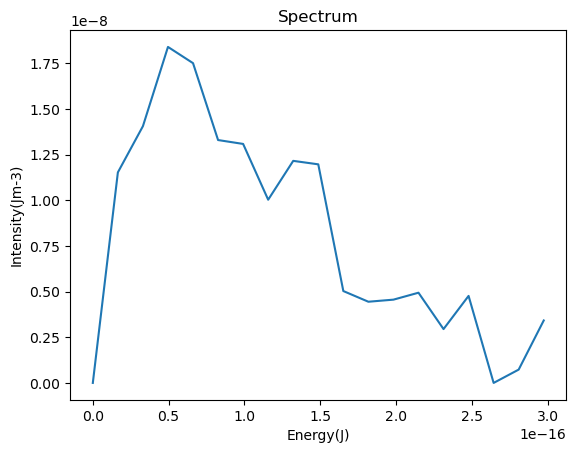

In [62]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(19)
for k in range(19):
    Energyarr1[k]=(length/19)*k


spec=np.interp( np.linspace(0,max(Energyarr),19),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:31:17,535 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:31:17,535 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:31:17,536 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:31:17,536 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:31:17,960 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:31:17,961 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:31:17,961 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:31:17,962 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


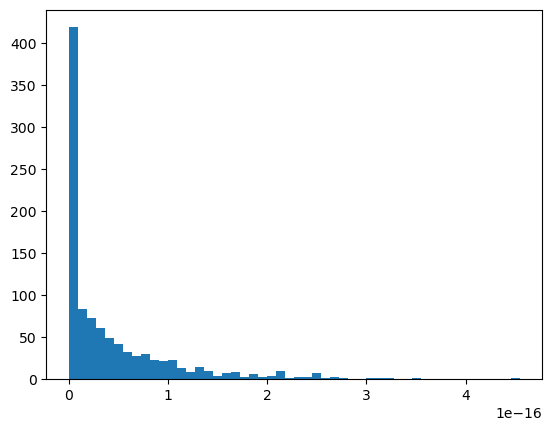

In [30]:
ds = yt.load('warpx/diags/diag1000000(5.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(5.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)





counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
sigmaspec[10]=np.array(counts)

4.457514639926797e-16


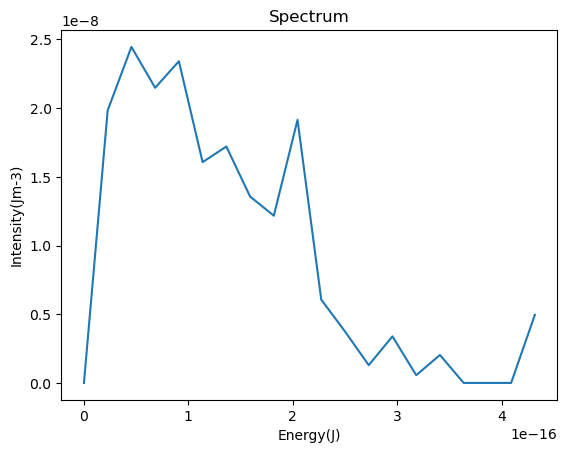

In [31]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:31:31,710 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:31:31,711 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:31:31,712 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:31:31,712 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:31:32,256 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:31:32,256 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:31:32,257 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:31:32,258 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


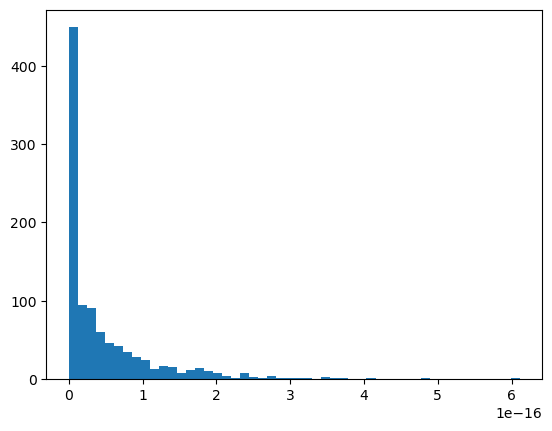

In [32]:
ds = yt.load('warpx/diags/diag1000000(6)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(6)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)





counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
sigmaspec[11]=np.array(counts)

5.991835843304969e-16


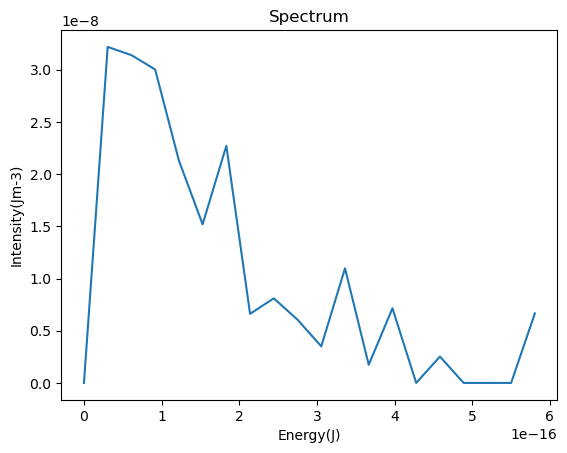

In [33]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:31:53,250 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:31:53,251 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:31:53,251 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:31:53,252 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:31:53,671 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:31:53,672 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:31:53,672 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:31:53,673 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


[413.  79.  81.  53.  55.  42.  37.  37.  27.  18.  20.  12.  14.  13.
  13.   5.  10.   6.   9.   5.   6.  12.   4.   4.   2.   1.   0.   1.
   0.   2.   1.   2.   2.   1.   1.   3.   1.   0.   0.   1.   2.   2.
   0.   1.   0.   0.   0.   0.   0.   2.]


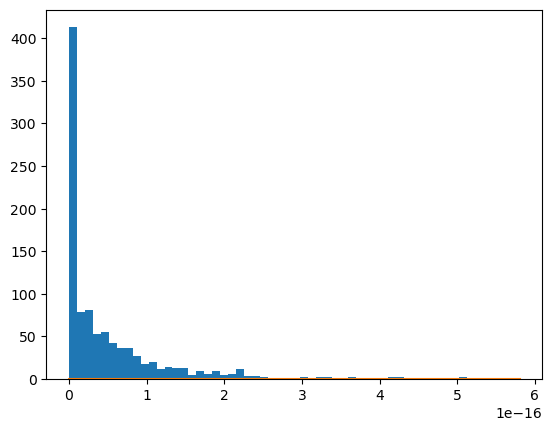

In [34]:
ds = yt.load('warpx/diags/diag1000000(6.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(6.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)

counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
print(counts)
sigmaspec[12]=np.array(counts)
plt.plot(Energyarr1,spec)

5.029372372605522e-16


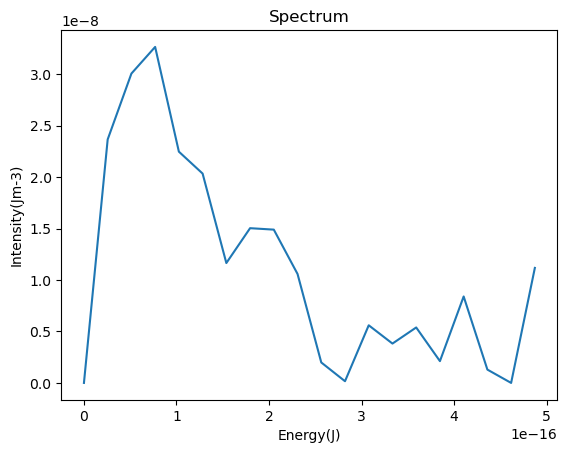

In [35]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:32:09,291 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:32:09,292 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:32:09,293 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:32:09,293 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:32:09,708 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:32:09,708 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:32:09,709 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:32:09,709 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


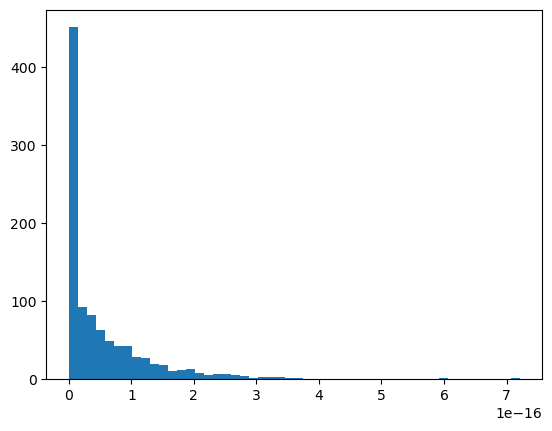

In [36]:
ds = yt.load('warpx/diags/diag1000000(7)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag10012707(2)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)



counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
sigmaspec[13]=np.array(counts)

7.070898449003977e-16


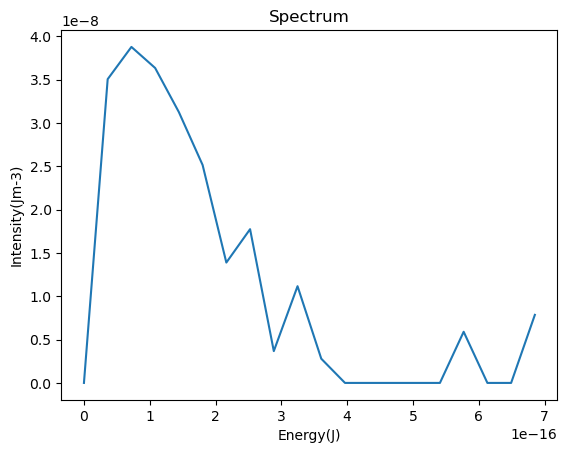

In [37]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:32:22,020 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:32:22,021 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:32:22,021 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:32:22,022 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:32:22,559 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:32:22,560 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:32:22,560 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:32:22,561 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


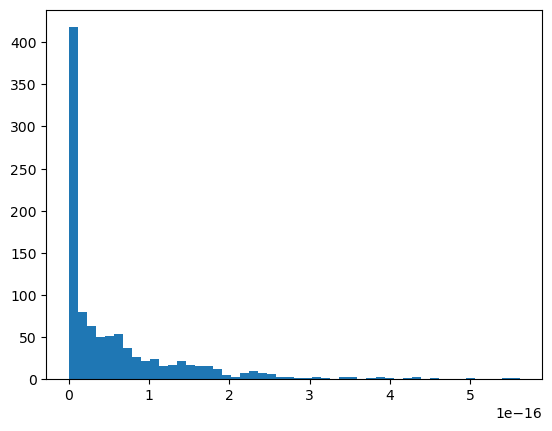

In [38]:
ds = yt.load('warpx/diags/diag1000000(7.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(7.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
sigmaspec[14]=np.array(counts)

5.508755530786559e-16


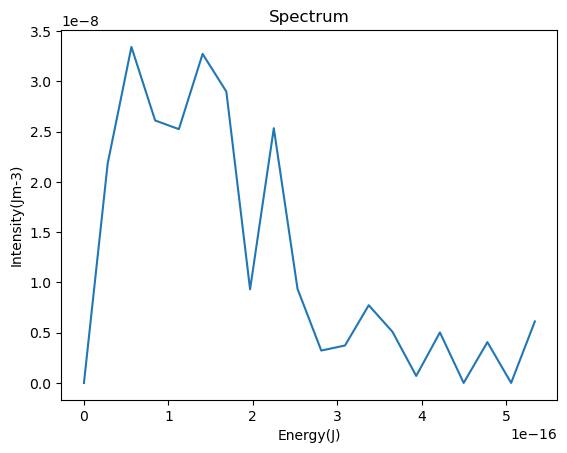

In [39]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:32:33,414 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:32:33,414 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:32:33,415 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:32:33,415 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:32:33,838 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:32:33,838 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:32:33,839 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:32:33,839 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


[441.  96.  73.  57.  46.  53.  37.  28.  28.  26.  17.  14.  12.   6.
   9.  14.   5.   8.   5.   2.   3.   7.   2.   1.   4.   0.   0.   0.
   0.   3.   0.   1.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   1.]


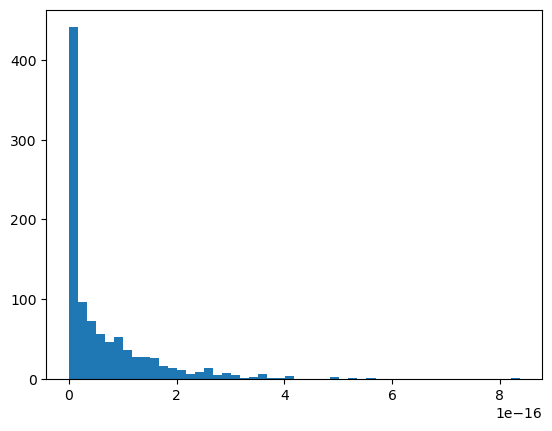

In [40]:
ds = yt.load('warpx/diags/diag1000000(8)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag10012709(8)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
print(counts)
sigmaspec[15]=np.array(counts)

8.20505868554973e-16


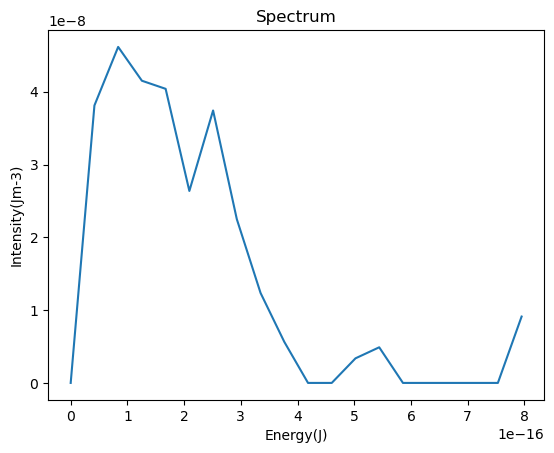

In [41]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:32:53,551 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:32:53,552 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:32:53,553 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:32:53,553 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:32:54,103 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:32:54,104 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:32:54,104 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:32:54,105 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


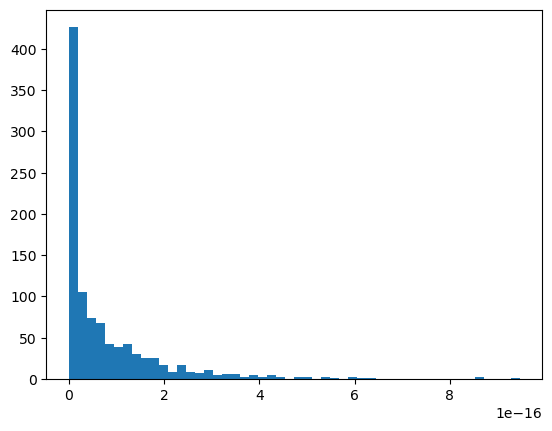

In [42]:
ds = yt.load('warpx/diags/diag1000000(8.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(8.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
sigmaspec[16]=np.array(counts)

9.283102850384118e-16


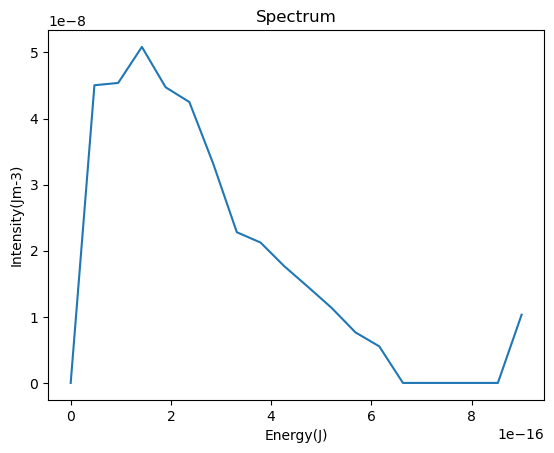

In [43]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:33:16,583 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:33:16,583 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:33:16,584 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:33:16,584 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:33:17,008 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:33:17,009 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:33:17,009 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:33:17,010 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


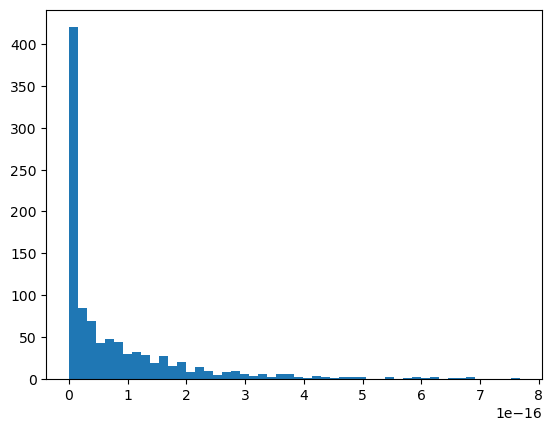

In [44]:
ds = yt.load('warpx/diags/diag1000000(9)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(9)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
sigmaspec[17]=np.array(counts)

7.527452295156971e-16


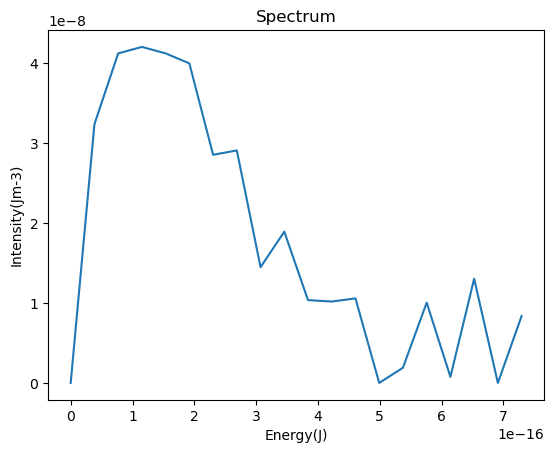

In [45]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:35:49,766 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:35:49,766 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:35:49,767 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:35:49,768 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:35:50,175 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:35:50,175 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:35:50,176 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:35:50,176 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


[434.  82.  80.  66.  48.  44.  39.  25.  24.  19.  25.  12.  12.  10.
  11.  13.   5.   7.   4.   9.   2.   2.   6.   2.   2.   2.   2.   1.
   1.   1.   1.   0.   0.   0.   0.   1.   0.   0.   1.   0.   1.   1.
   3.   0.   0.   1.   0.   0.   0.   1.]


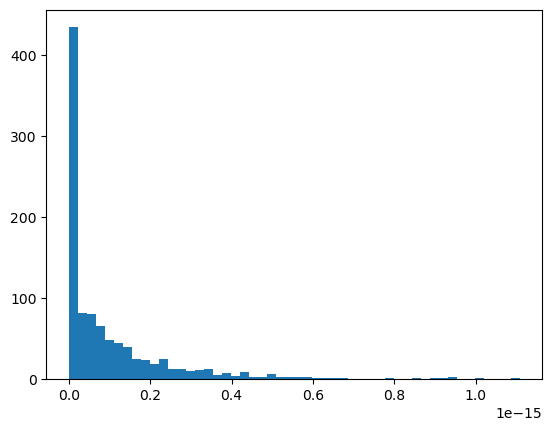

In [56]:
ds = yt.load('warpx/diags/diag1000000(9.5)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(9.5)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)

counts=np.array(counts[0])
print(counts)
sigmaspec[18]=np.array(counts)

1.086572200285774e-15


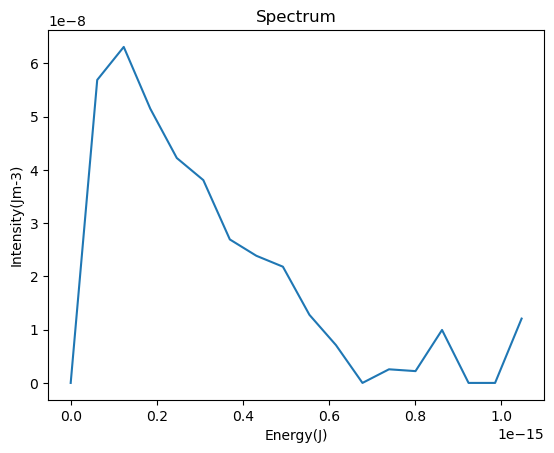

In [59]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(18)
for k in range(18):
    Energyarr1[k]=(length/18)*k


spec=np.interp( np.linspace(0,max(Energyarr),18),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

yt : [INFO     ] 2024-03-26 17:33:45,233 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-26 17:33:45,233 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:33:45,234 Parameters: domain_left_edge          = [-0.00015    -0.00015    -0.00239398]
yt : [INFO     ] 2024-03-26 17:33:45,234 Parameters: domain_right_edge         = [1.50000000e-04 1.50000000e-04 1.99498744e-05]
yt : [INFO     ] 2024-03-26 17:33:45,662 Parameters: current_time              = 3.931782533368373e-11
yt : [INFO     ] 2024-03-26 17:33:45,662 Parameters: domain_dimensions         = [ 32  32 256]
yt : [INFO     ] 2024-03-26 17:33:45,663 Parameters: domain_left_edge          = [-0.00015    -0.00015     0.00939281]
yt : [INFO     ] 2024-03-26 17:33:45,664 Parameters: domain_right_edge         = [0.00015    0.00015    0.01180674]


[454. 101.  72.  61.  57.  39.  35.  25.  25.  22.  15.  23.   3.  11.
   6.   8.   9.   3.   2.   6.   4.   4.   1.   2.   1.   3.   1.   0.
   0.   1.   0.   1.   1.   0.   0.   1.   0.   0.   2.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   1.]


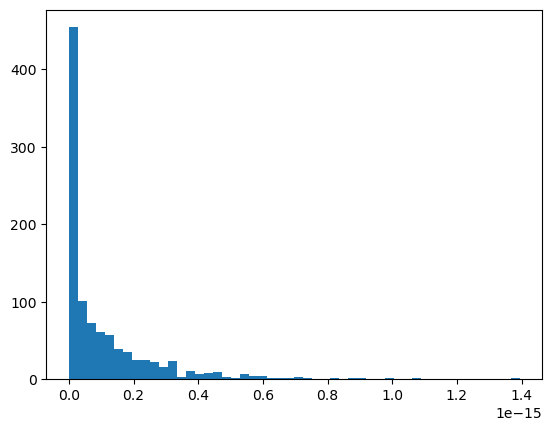

In [48]:
ds = yt.load('warpx/diags/diag1000000(10)')
ad = ds.all_data()
xinit = ad[('beam','particle_position_x')].to_ndarray()
yinit = ad[('beam','particle_position_y')].to_ndarray()
zinit = ad[('beam','particle_position_z')].to_ndarray()

ds = yt.load('warpx/diags/diag1001270(10)')

ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ex_array = ad0['Ex'].to_ndarray()
ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
Ey_array = ad0['Ey'].to_ndarray()
ad = ds.all_data()
xfinal = ad[('beam','particle_position_x')].to_ndarray()
yfinal = ad[('beam','particle_position_y')].to_ndarray()
zfinal = ad[('beam','particle_position_z')].to_ndarray()

unit=(3*10**-4)/32
xcell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    
  xcell[i]=round((xfinal[i]/unit))+16


ycell=np.zeros(len(yfinal))
for i in range(len(yfinal)):
    
  ycell[i]=round((xfinal[i]/unit))+16

zcell=np.zeros(len(zfinal))
unitz=(0.012-0.0094)/256
for i in range(len(zfinal)):
    
  zcell[i]=round((xfinal[i]/unitz))

Excell=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    Excell[i]=Ex_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]
Eycell=np.zeros(len(yfinal))

for i in range(len(yfinal)):
    Eycell[i]=Ey_array[np.array(xcell[i], dtype=int)][np.array(ycell[i], dtype=int)][np.array(zcell[i], dtype=int)]  
    
Spectrum=np.zeros(len(xfinal))
for i in range(len(xfinal)):
    dx=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    #print(dx)
    dy=np.array(yfinal[i], dtype=float)-np.array(yinit[i], dtype=float)
    Spectrum[i]= ((((dx*np.array(Excell[i], dtype=float)))**2 +((dy*np.array(Eycell[i], dtype=float))**2))**0.5)*1.6*10**-19
#count, bins, ignored = plt.hist(Spectrum, 50, density=True)
counts=plt.hist(Spectrum,50)
counts=np.array(counts[0])
print(counts)
sigmaspec[19]=np.array(counts)

sigmaspecsave=sigmaspec

1.3670677647207276e-15


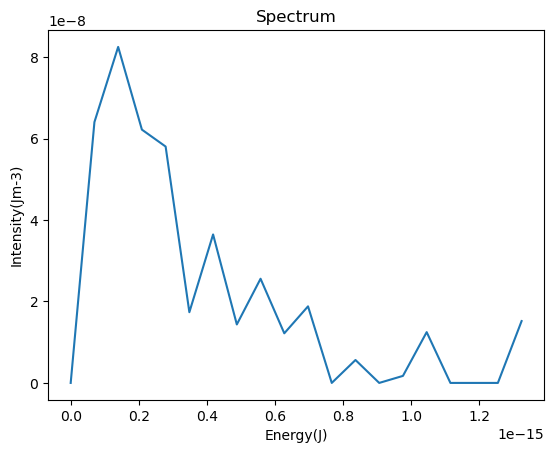

In [49]:
length=max(Spectrum)-min(Spectrum)
counts0=counts
counts1=np.zeros(51)
counts1[0]=0
for k in range(50):
    counts1[k+1]=counts0[k]


Energyarr=np.zeros(51)
for k in range(51):
    Energyarr[k]=(length/51)*k
Intensity=(counts1*Energyarr)/((3*10**-4)**2)
print(max(Energyarr))
Energyarr1=np.zeros(20)
for k in range(20):
    Energyarr1[k]=(length/20)*k


spec=np.interp( np.linspace(0,max(Energyarr),20),Energyarr,Intensity)

plt.title("Spectrum")
plt.xlabel("Energy(J)")
plt.ylabel("Intensity(Jm-3)")
plt.plot(Energyarr1,spec)

In [51]:
#Ml only
import numpy as np 
import matplotlib.pyplot as plt
sigmaspec=sigmaspecsave

                                                                                                                                                                                                                                                                                                              
                                                                                                                                                                                                                                                                                                         

maxlikef=np.ones(len(sigmaspec))

yspect=np.zeros((40,50))
likelihoodf=np.ones(len(yspect))
testsigma=np.zeros(19)
sigmaactual=np.ones(len(yspect))
for i in range(len(yspect)):
     randomnum=np.random.randint(0,19)
     

     yspect[i]=sigmaspec[randomnum]
     sigmaactual[i]=sigmaarr[randomnum]

likelihoodfunction=np.zeros((40,19))   

sigma2f=np.ones(len(yspect))
sigmaarr=np.zeros(20)
n=0
for i in range(0,len(sigmaarr)):
       n=n+0.5
       sigmaarr[i]=n


                
              
            
                
            
#print(reducedarr)    
            
yspect1=yspect            

sigmaactual1=sigmaactual
yspect=sigmaspec

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[0.5 4.  5.5 2.5 8.5 1.  8.5 3.  2.  1.  8.5 2.  1.5 9.5 5.  5.  5.5 7.
 2.  6.  0.5 9.5 8.5 8.5 6.5 6.5 9.  6.5 8.5 4.5 3.  9.  1.  8.5 2.5 2.5
 3.5 4.  6.5 2.5]
[0.5 4.  5.5 2.5 8.5 1.  8.5 3.  2.  1.  8.5 2.  1.5 9.5 5.  5.  5.5 7.
 2.  6.  0.5 9.5 8.5 8.5 6.5 6.5 9.  6.5 8.5 4.5 3.  9.  1.  8.5 2.5 2.5
 3.5 4.  6.5 2.5]
0.0
--- 0.39708948135375977 seconds ---


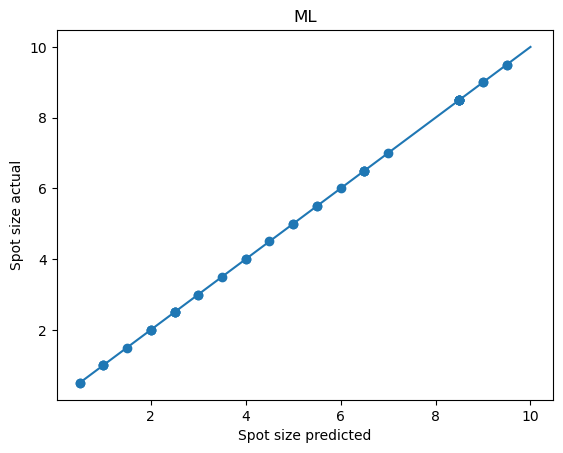

In [52]:
#ML only

import time
start_time = time.time()
from sklearn.neural_network import MLPClassifier
sigmapos=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
from sklearn.model_selection import train_test_split

sigmapos=np.zeros(len(sigmaarr))

for i in range(len(sigmaarr)):
    
    sigmapos[i]=(sigmaarr[i]*2)-1
sigmapos=sigmapos.astype('int')
print(sigmapos)
testdata=yspect.astype('int')


sigmaarr=np.array(sigmaarr)
mlp = MLPClassifier(solver = 'adam', activation = 'tanh', alpha = 1e-5, hidden_layer_sizes = (500, 200), 
                    random_state = 1, max_iter = 10000)

mlp.fit(sigmaspec,sigmapos)

predict=mlp.predict(yspect1)

sigmapred=np.zeros(len(predict))
for i in range(len(sigmapred)):
    sigmapred[i]=sigmaarr[predict[i]]
    
#sigmapred=(predict+1)*0.5
print(sigmapred)
print(sigmaactual1)
meansquarederror=(sum((sigmaactual1-sigmapred)**2))/len(sigmaactual1)
print(meansquarederror)
print("--- %s seconds ---" % (time.time() - start_time))
plt.figure
plt.title("ML")
plt.xlabel("Spot size predicted")
plt.ylabel("Spot size actual")
plt.scatter(sigmapred,sigmaactual1)
plt.plot(sigmaarr,sigmaarr)